# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [74]:
import numpy as np
import pprint

np.random.seed(42)  # For reproducibility

def initialize_network(input_size, hidden_layers, output_size):
    #TE: Initializing number of previous nodes
    num_nodes_previous = input_size
    #TE: Declaring network
    network = []
    #TE: Number of hidden layers
    num_hidden_layers = len(hidden_layers)

    #TE: Loop through each layer and randomly assign weights and biases
    for layer in range(num_hidden_layers + 1):
        #TE: Dictionary to store weights & biases
        layer_dic = {}
        
        if layer == num_hidden_layers:
            #TE: Output layer nodes
            num_nodes = output_size
        else:
            #TE: Hidden layer nodes
            num_nodes = hidden_layers[layer]
        
        #TEL Initializing weights: (num_nodes_previous, num_nodes)
        layer_dic['weights'] = np.around(np.random.uniform(size=(num_nodes_previous, num_nodes)), decimals=5)

        #TE: Initializing biases: (1, num_nodes)
        layer_dic['biases'] = np.around(np.random.uniform(size=(1, num_nodes)), decimals=5)

        #TE: Append layer dictionary to network list
        network.append(layer_dic)
        num_nodes_previous = num_nodes  # Update for next layer

    return network

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)

# Pretty print the network
pretty_dict_str = pprint.pformat(network)
print("Telmen Enkhtuvshin + Initialized Network:\n\n", pretty_dict_str)


Telmen Enkhtuvshin + Initialized Network:

 [{'biases': array([[0.83244, 0.21234, 0.18182, 0.1834 ]]),
  'weights': array([[0.37454, 0.95071, 0.73199, 0.59866],
       [0.15602, 0.15599, 0.05808, 0.86618],
       [0.60112, 0.70807, 0.02058, 0.96991]])},
 {'biases': array([[0.59241, 0.04645, 0.60754]]),
  'weights': array([[0.30424, 0.52476, 0.43195],
       [0.29123, 0.61185, 0.13949],
       [0.29214, 0.36636, 0.45607],
       [0.78518, 0.19967, 0.51423]])},
 {'biases': array([[0.96563]]),
  'weights': array([[0.17052],
       [0.06505],
       [0.94889]])}]


In [55]:
# Scratch work
array_2d = np.empty((0, 4))
nparr1 = np.array([1,2,3,4])
nparr2 = np.array([5,6,7,8])

array_2d = np.vstack((array_2d, nparr1))
array_2d = np.vstack((array_2d, nparr2))
array_2d

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

In [56]:
network[0]

{'weights': array([[0.37454, 0.95071, 0.73199, 0.59866],
        [0.15602, 0.15599, 0.05808, 0.86618],
        [0.60112, 0.70807, 0.02058, 0.96991]]),
 'biases': array([[0.83244, 0.21234, 0.18182, 0.1834 ]])}

## Step 2: Compute Weighted Sum

In [57]:
def compute_weighted_sum(inputs, weights, biases):
    # Please numpy dot to calcuate the compute weighted with linear 
    # provide your code
    
    #TE: Calculating weighted sum for for a single node
    return np.sum(np.dot(inputs, weights)) + biases
    

# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network[0]  # First layer
Z = compute_weighted_sum(inputs, layer['weights'], layer['biases'])
print("Telmen Enkhtuvshin + Weighted Sum:", Z)

Telmen Enkhtuvshin + Weighted Sum: [[2.637612 2.017512 1.986992 1.988572]]


## Step 3: Compute Node Activation

In [59]:
def sigmoid(Z):
#     provide your code
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    # provide your code
    return A * (1 - A)

# Compute activation for the weighted sum
A = sigmoid(Z)
print("Telmen Enkhtuvshin + Activation:", A)

Telmen Enkhtuvshin + Activation: [[0.93324335 0.8826235  0.87942454 0.87959198]]


## Step 4: Perform Forward Propagation

In [72]:
def forward_propagation(inputs, network):
    # provide your code
    #TE: Start with the input layer
    activations = [inputs]
    #TE: Looping over the layers in network
    for layer in network:
        #TE: Retrieve weights and biases
        weights = layer['weights']
        biases = layer['biases']
        
        #TE: Compute weighted sum: Z = X * W + B (broadcasting ensures correct shape)
        Z = np.dot(activations[-1], weights) + biases

        #TE: Apply activation function
        A = sigmoid(Z)

        #TE: Store the activations for the layer
        activations.append(A)
    #TE: Finally returning the activation dictionary
    return activations


# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations,'\n')
print("Telmen Enkhtuvshin + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([[0.752743  , 0.68824968, 0.63732437, 0.68032089]]), array([[0.85100157, 0.77417325, 0.84166578]]), array([[0.87738104]])] 

Telmen Enkhtuvshin + Final Output: [[0.87738104]]


## Step 5: Backpropagation

In [69]:
def backpropagation(network, activations, y_true):
    # provide your code

    #TE: Step 1 - Compute deltas for the output layer
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])

    # Temporary list to store gradients in reverse order
    reverse_gradients = []

    # Step 2: Backpropagate through each layer
    delta = delta_output  # Start with output layer's delta
    for layer_idx in reversed(range(len(network))):
        layer = network[layer_idx]  # Get the current layer
        
        # Compute gradients for this layer
        dW = np.dot(activations[layer_idx].T, delta)  # Gradient of weights
        db = np.sum(delta, axis=0, keepdims=True)  # Gradient of biases

        # Store the gradients at the beginning of the final list (ensures correct order)
        reverse_gradients.insert(0, {'dW': dW, 'db': db})

        #TE: Compute delta for hidden layers (skip for the input layer)
        if layer_idx > 0:
            next_layer = network[layer_idx]        #TE: Current layer's weights used for next step
            weight_matrix = next_layer['weights']  #TE: Get weight matrix
            
            #TE: Compute new delta
            delta = np.dot(delta, weight_matrix.T) * sigmoid_derivative(activations[layer_idx])
    
    #TE: Final result has gradients in the correct order
    return reverse_gradients

# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
ppt_grd = pprint.pformat(gradients)
print("Telmen Enkhtuvshin + Gradients:\n\n", ppt_grd)

Telmen Enkhtuvshin + Gradients:

 [{'dW': array([[-8.38279728e-05, -4.44370161e-05, -1.05579004e-04,
        -1.22850398e-04],
       [-3.35311891e-05, -1.77748064e-05, -4.22316016e-05,
        -4.91401591e-05],
       [-1.67655946e-05, -8.88740322e-06, -2.11158008e-05,
        -2.45700796e-05]]),
  'db': array([[-1.67655946e-04, -8.88740322e-05, -2.11158008e-04,
        -2.45700796e-04]])},
 {'dW': array([[-2.17713364e-04, -1.14487421e-04, -1.27427349e-03],
       [-1.99032300e-04, -1.04663739e-04, -1.16493347e-03],
       [-1.84282159e-04, -9.69071840e-05, -1.07860108e-03],
       [-1.96733324e-04, -1.03454792e-04, -1.15147759e-03]]),
  'db': array([[-0.00028939, -0.00015218, -0.00169379]])},
 {'dW': array([[-0.0113797 ],
       [-0.01035179],
       [-0.01125269]]),
  'db': array([[-0.01337426]])}]


## Step 6: Update Weights

In [71]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code
    #TE: Iterating over the network by layer
    for layer_idx in range(len(network)):
        #TE: Access the layer
        layer = network[layer_idx]

        #TE: Access gradients for the corresponding layer
        dW = gradients[layer_idx]['dW']
        db = gradients[layer_idx]['db']

        #TE: Update weights and biases using gradient descent
        layer['weights'] -= learning_rate * dW
        layer['biases'] -= learning_rate * db

# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
ppt_new_net = pprint.pformat(network)
print("Telmen Enkhtuvshin + Updated Network:\n\n", ppt_new_net)

Telmen Enkhtuvshin + Updated Network:

 [{'biases': array([[0.83381096, 0.2136952 , 0.18319966, 0.18478657]]),
  'weights': array([[0.37569474, 0.95185686, 0.73314909, 0.59982254],
       [0.15706189, 0.15702873, 0.05912363, 0.86722501],
       [0.60224862, 0.70919705, 0.02170949, 0.97104018]])},
 {'biases': array([[0.59249682, 0.04649565, 0.60804814]]),
  'weights': array([[0.30430531, 0.52479435, 0.43233228],
       [0.29128971, 0.6118814 , 0.13983948],
       [0.29219528, 0.36638907, 0.45639358],
       [0.78523902, 0.19970104, 0.51457544]])},
 {'biases': array([[0.96830485]]),
  'weights': array([[0.17279594],
       [0.06712036],
       [0.95114054]])}]


## Step 7: Visualizing Loss Changes

In [73]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    # provide your code
    return np.mean((y_true - y_pred) ** 2)

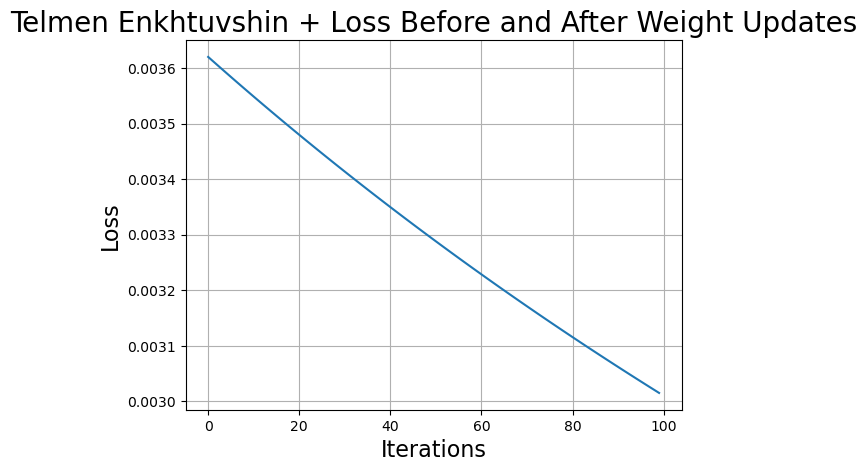

In [79]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
     

    # gradients = backpropagation function
    # update_weights
    #TE: Step 1: Perform forward propagation to compute the network's predictions
    activations = forward_propagation(inputs, network)  # Forward pass
    
    #TE: Step 2: Compute the loss (error) between the true labels and the predicted output
    loss = compute_loss(y_true, activations[-1])  # Loss for the current iteration
    losses.append(loss)  # Append the computed loss to the list
    
    #TE: Step 3: Perform backpropagation to compute gradients and update weights
    gradient = backpropagation(network, activations, y_true)
    #TE: Updating weights of the network
    update_weights(network, gradient, learning_rate)

    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Telmen Enkhtuvshin + Loss Before and After Weight Updates", fontsize=20)
plt.xlabel("Iterations", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.grid()
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code